In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset

lccs = pd.read_csv('loan.csv')
lccs.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
lccs.shape

(39717, 111)

In [4]:
lccs.isna().mean()*100

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [5]:
##Identify columns with all NA values >= 60%
loan_df = pd.read_csv('loan.csv')
df_cols = pd.DataFrame(loan_df.isna().mean()*100)

df_cols_with_na = df_cols[df_cols[0] >= 60]
df_cols_with_na.index.name = 'col_name'
df_cols_with_na.reset_index(inplace=True)
na_list = df_cols_with_na['col_name'].tolist()

## dropping those columns with 60% missing data
loan_df.drop(na_list, axis =1, inplace = True)
loan_df.columns

## writing the file to excel to analyse
#loan_df.to_excel('loan_df.xlsx', index = None)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [6]:
loan_df.shape

(39717, 54)

In [7]:
loan_df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
desc                           object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_

In [8]:
# selecting the loans_status other than 'current', as we cannot derive insights from these running loans.
# so considering only 'Charged-off' and 'Fully-paid' loans in the dataset.
loan_df = loan_df[loan_df['loan_status'] != 'Current']
print('Shape of the dataframe with Charged-off and Fully-paid loans: ',loan_df.shape)

Shape of the dataframe with Charged-off and Fully-paid loans:  (38577, 54)


In [9]:
loan_df.nunique()

id                            38577
member_id                     38577
loan_amnt                       870
funded_amnt                    1019
funded_amnt_inv                8050
term                              2
int_rate                        370
installment                   15022
grade                             7
sub_grade                        35
emp_title                     28027
emp_length                       11
home_ownership                    5
annual_inc                     5215
verification_status               3
issue_d                          55
loan_status                       2
pymnt_plan                        1
url                           38577
desc                          25803
purpose                          14
title                         19297
zip_code                        822
addr_state                       50
dti                            2853
delinq_2yrs                      11
earliest_cr_line                524
inq_last_6mths              

In [10]:
#shape before dropping
print('shape of dataframe before dropping : ',loan_df.shape)
# Identifying & dropping the columns containing 0/nan
print('unique values in collections_12_mths_ex_med:', loan_df['collections_12_mths_ex_med'].unique())
print('unique values in acc_now_delinq:', loan_df['acc_now_delinq'].unique())
print('unique values in chargeoff_within_12_mths:', loan_df['chargeoff_within_12_mths'].unique())
print('unique values in delinq_amnt:', loan_df['delinq_amnt'].unique())
print('unique values in pymnt_plan:', loan_df['pymnt_plan'].unique())
print('unique values in tax_liens:', loan_df['tax_liens'].unique())
print('unique values in out_prncp:', loan_df['out_prncp'].unique())
print('unique values in out_prncp_inv:', loan_df['out_prncp_inv'].unique())


loan_df.drop(['collections_12_mths_ex_med','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','pymnt_plan' , 
              'tax_liens','out_prncp','out_prncp_inv'], axis=1,inplace = True)

print('shape of dataframe post dropping 0/nan valued columns :',loan_df.shape)

shape of dataframe before dropping :  (38577, 54)
unique values in collections_12_mths_ex_med: [ 0. nan]
unique values in acc_now_delinq: [0]
unique values in chargeoff_within_12_mths: [ 0. nan]
unique values in delinq_amnt: [0]
unique values in pymnt_plan: ['n']
unique values in tax_liens: [ 0. nan]
unique values in out_prncp: [0.]
unique values in out_prncp_inv: [0.]
shape of dataframe post dropping 0/nan valued columns : (38577, 46)


In [11]:
# Dropping the columns containing only single value, These are not adding any value to analysis
print('shape of dataframe before dropping single valued columns : ',loan_df.shape)
print('unique values in application_type:', loan_df['application_type'].unique())
print('unique values in policy_code:', loan_df['policy_code'].unique())
print('unique values in initial_list_status:', loan_df['initial_list_status'].unique())

loan_df.drop(['initial_list_status','application_type','policy_code'], axis=1, inplace = True)
print('shape of dataframe post dropping single valued columns :',loan_df.shape)

shape of dataframe before dropping single valued columns :  (38577, 46)
unique values in application_type: ['INDIVIDUAL']
unique values in policy_code: [1]
unique values in initial_list_status: ['f']
shape of dataframe post dropping single valued columns : (38577, 43)


In [12]:
# dropping the columns which cannot be included in analysis, as they have very wide-spread subjective data
print('shape of dataframe before dropping wide spread columns :',loan_df.shape)

loan_df.drop(['url','desc','id'], axis=1, inplace = True)

print('shape of dataframe post dropping wide spread columns :',loan_df.shape)

shape of dataframe before dropping wide spread columns : (38577, 43)
shape of dataframe post dropping wide spread columns : (38577, 40)


In [13]:
# checking the NA values in the subset across columns
loan_df.isna().mean()*100

member_id                  0.000000
loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
sub_grade                  0.000000
emp_title                  6.185033
emp_length                 2.677761
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
purpose                    0.000000
title                      0.028514
zip_code                   0.000000
addr_state                 0.000000
dti                        0.000000
delinq_2yrs                0.000000
earliest_cr_line           0.000000
inq_last_6mths             0.000000
open_acc                   0.000000
pub_rec                    0.000000
revol_bal                  0.000000
revol_util                 0

In [14]:
# categorising major columns into categorical, numerical variables and loan attribute columns
cat_cols = ['term','grade','sub_grade','home_ownership','verification_status','loan_status', 'purpose','zip_code',
           'addr_state']

num_cols = ['emp_length','annual_inc','delinq_2yrs','inq_last_6mths','total_rec_prncp','total_rec_int','total_rec_late_fee',
           'recoveries','collection_recovery_fee','earliest_cr_line']

loan_att_cols = ['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','dti','open_acc','pub_rec',
                 'revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv',
                 'total_rec_prncp','total_rec_int','total_rec_late_fee','last_pymnt_amnt','pub_rec_bankruptcies']


## Univariate Analysis

In [15]:
# distribution of 'term' of the loan
loan_df.groupby('term').size()/len(loan_df) * 100

term
 36 months    75.42318
 60 months    24.57682
dtype: float64

In [16]:
loan_df['term'].replace(' 36 months', 36, inplace =True)
loan_df['term'].replace(' 60 months', 60, inplace =True)

In [17]:
loan_df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1296599,5000,5000,4975.0,36,10.65%,162.87,B,B2,NaN,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1314167,2500,2500,2500.0,60,15.27%,59.83,C,C4,Ryder,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1313524,2400,2400,2400.0,36,15.96%,84.33,C,C5,NaN,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1277178,10000,10000,10000.0,36,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
5,1311441,5000,5000,5000.0,36,7.90%,156.46,A,A4,Veolia Transportaton,...,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0


In [18]:
loan_df['loan_status_flag'] = loan_df['loan_status'].apply(lambda x: 0 if x=='Charged Off' else 1)

1    88.909128
0    11.090872
Name: loan_status_flag, dtype: float64


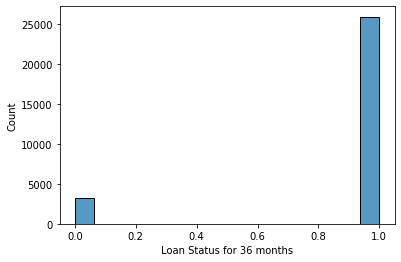

In [19]:
#The loan tenure of charged off vs fully repoaid in 36 months
loan_df_36 = loan_df[loan_df.term == 36]
sns.histplot(loan_df_36.loan_status_flag)
plt.xlabel('Loan Status for 36 months')
print(loan_df_36.loan_status_flag.value_counts(normalize = True)*100)

1    74.686215
0    25.313785
Name: loan_status_flag, dtype: float64


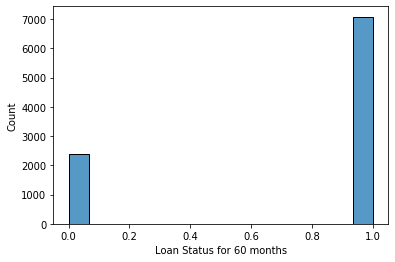

In [20]:
#The loan tenure of charged off vs fully repoaid in 60 months
loan_df_60 = loan_df[loan_df.term == 60]
sns.histplot(loan_df_60.loan_status_flag)
plt.xlabel('Loan Status for 60 months')
print(loan_df_60.loan_status_flag.value_counts(normalize = True)*100)

60 months Term of the loan shows higher Charged off percentage

In [21]:
loan_df.home_ownership.value_counts(normalize = True)*100

RENT        47.904192
MORTGAGE    44.122145
OWN          7.711849
OTHER        0.254037
NONE         0.007777
Name: home_ownership, dtype: float64

In [22]:
# replacing 'NONE' with 'OTHER'
loan_df.home_ownership.replace('NONE','OTHER', inplace =True)
loan_df.home_ownership.value_counts(normalize = True)*100

RENT        47.904192
MORTGAGE    44.122145
OWN          7.711849
OTHER        0.261814
Name: home_ownership, dtype: float64

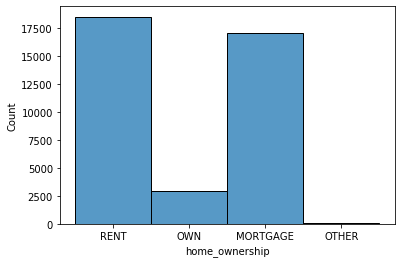

In [23]:
sns.histplot(loan_df.home_ownership)

### Defining a Function for Analyzing the Columns with 'Charged Off', 'Fully Paid' and 'Both Charged Off and 'Fully Paid'

In [24]:
def plot_hist(df_nm,col_nm,status_flag):
    df_nm.sort_values(col_nm, ascending = False, inplace = True)
    if status_flag != 3:
        df_nm = df_nm[df_nm.loan_status_flag == status_flag]
    print(df_nm[col_nm].value_counts())
    print("============================================")
    print(df_nm[col_nm].value_counts(normalize=True)*100)
    
    plt.figure(figsize = (30,5))
    sns.histplot(df_nm[col_nm])
    if(status_flag == 1 ):
        plt.xlabel(col_nm +' fully paid')
    elif (status_flag == 0 ) :
        plt.xlabel(col_nm +' charged off') 
    elif (status_flag == 3):
        plt.xlabel(col_nm)

In [25]:
  # fully paid
    plot_hist(loan_df,'home_ownership',1)   

IndentationError: unexpected indent (<ipython-input-25-de04d26c7216>, line 2)

In [ ]:
plot_hist(loan_df,'home_ownership',0) 

#Percentage Distribution provided below

Rental & Mortgage have higher probability of charge off than rest categories

In [ ]:
#loan_df.purpose.value_counts(normalize = True)*100
plot_hist(loan_df,'purpose',3)

In [ ]:
plot_hist(loan_df,'purpose',1) 

In [ ]:
plot_hist(loan_df,'purpose',0) 


It is observed that around 49% of the charge off has happened due to debt_consolidation

In [ ]:
plot_hist(loan_df,'verification_status',3)

In [ ]:
plot_hist(loan_df,'verification_status',1)

In [ ]:
plot_hist(loan_df,'verification_status',0)

No appropriate conclusion

In [ ]:
# subgrade
plot_hist(loan_df,'sub_grade',3)

In [ ]:
plot_hist(loan_df,'sub_grade',1)

In [ ]:
plot_hist(loan_df,'sub_grade',0)

Observation on 'Grade' categories: Most of the Charged-off are observed in 'B' and 'C' Grades, almost 50% of the Chargeoff Population, but it is alos observed that number of loans in lower sub-grades are more than its higher sub-grades, except for Grade C, where it is a opposite trend.

In [ ]:
#Employement Length
loan_df.emp_length.unique()

In [ ]:
# converting the 'emp_length' column to int from string.
loan_df['emp_length'].replace('< 1 year', '0 years', inplace = True)
loan_df['emp_length'].replace('10+ years', '10 years', inplace = True)
#loan_df['emp_length'] = loan_df['emp_length'].apply(lambda x: (x.split(' ')[0]))
print(loan_df['emp_length'].unique())
loan_df['emp_length'] = loan_df['emp_length'].apply(lambda x: x if pd.isnull(x) else float(x.split(' ')[0]))
print(loan_df['emp_length'].unique())

In [ ]:
print(loan_df['emp_length'].describe())
plt.figure(figsize = (10,5))
sns.histplot(loan_df.emp_length)

In [ ]:
plot_hist(loan_df,'emp_length',0)

In [ ]:
plot_hist(loan_df,'emp_length',1)

Observation: Employment length is not providing any insights here, as borrowers with 10+ years of employment are more in both the population 'Fully Paid' and 'Charged-off'

In [ ]:
print(loan_df.annual_inc.value_counts(normalize = True)*100)
sns.boxplot(loan_df['annual_inc'])

In [ ]:
#converting 'annual_inc' to 'log_annual_inc', i.e. log of annual income inorder to fit it into box-plot and check outliers
loan_df['log_annual_inc'] = loan_df['annual_inc'].apply(lambda x: np.log10(x))
sns.boxplot(loan_df['log_annual_inc'])


In [ ]:
loan_df.groupby('loan_status')['log_annual_inc'].describe()

In [ ]:
# Fully Paid
loan_df_fp = loan_df[loan_df['loan_status_flag'] == 1]
plt.boxplot(loan_df_fp['log_annual_inc'])

In [ ]:
# Charged Off
loan_df_ci = loan_df[loan_df['loan_status_flag'] == 0]
plt.boxplot(loan_df_ci['log_annual_inc'])

Observation: Charged Off accounts have less spread of Income when compared to Fully Paid accounts, so it shows higher income accounts are less likely to Default.

In [ ]:
# distribution of 'loan_status' of the loan
loan_df.loan_status.value_counts(normalize = True)*100

In [ ]:
# since 'int_rate' is a string datatype, converting it into float
loan_df.int_rate = loan_df.int_rate.apply(lambda x: float(x.strip('%')))

In [ ]:
print(loan_df.int_rate.describe())
plt.figure(figsize=(5,5))
sns.boxplot(loan_df['int_rate'] )

In [ ]:
loan_df.groupby('loan_status')['int_rate'].describe()

In [ ]:
plt.boxplot(loan_df_ci['int_rate'] )

Observation: 'Charged Off' accounts are charged higher Interest Rates when compared to 'Fully Paid' accounts, almost by 3%

In [ ]:
# installment
print(loan_df.installment.describe())
plt.figure(figsize=(10,5))
sns.histplot(loan_df['installment'] )

In [ ]:
loan_df.groupby('loan_status')['installment'].describe()

In [ ]:
#sns.boxplot(loan_df_ci['installment'] )
sns.histplot(loan_df_ci['installment'] )

In [ ]:
#sns.boxplot(loan_df_fp['installment'] )
sns.histplot(loan_df_fp['installment'] )

Observation: Installments are marginally higher for Charged Off Accounts when compared to Fully Paid accounts, which is intuitive as Interest rates are also higher for Charged Off accounts than Fully Paid accounts

In [ ]:
# dti
print(loan_df.dti.describe())
plt.figure(figsize=(10,5))
sns.histplot(loan_df['dti'] )

In [ ]:
loan_df.groupby('loan_status')['dti'].describe()

In [ ]:
sns.histplot(loan_df_fp['dti'] )

In [ ]:
sns.histplot(loan_df_ci['dti'] )

Observation: Charged Off loans have marginally higher dti when compared to Fully Paid loans. 

In [ ]:
# earliest_cr_line
# converting the 'earliset_cr_line' to only 'Year' for looking into the history of Credit line Issued
import datetime

def pickDate(earliest_cr_line):
    dt = int(datetime.datetime.strptime(earliest_cr_line, '%b-%y').strftime('%Y'))
    
    if (dt >= 2030):
        dt-=100
    return dt 
loan_df.earliest_cr_line = loan_df.earliest_cr_line.apply(pickDate)
loan_df.earliest_cr_line

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(loan_df['earliest_cr_line'] )

In [ ]:
loan_df.groupby('loan_status')['earliest_cr_line'].describe()

In [ ]:
plot_hist(loan_df,'earliest_cr_line',0)
#sns.histplot(loan_df_ci['earliest_cr_line'] )

In [ ]:
plot_hist(loan_df,'earliest_cr_line',1)
#plt.boxplot(loan_df_fp['earliest_cr_line'] )

From above three graphs it is observed that there is an increase in numbers of new 'credit-lines' during the period 1993-2000. And it quite evindent that, Charged Off loans are also higher in numbers from this period.

In [ ]:
loan_df.groupby('loan_status')['delinq_2yrs'].describe()

In [ ]:
plot_hist(loan_df,'delinq_2yrs',3)

currently we canot conclude anything, but delinquency may be used in further, while carrying out Bivariate analysis

In [ ]:
#pub_rec_bankruptcies
loan_df.groupby('loan_status')['pub_rec_bankruptcies'].describe()

In [ ]:
#fully-paid
plot_hist(loan_df, 'pub_rec_bankruptcies', 1)

In [ ]:
# Charged-off
plot_hist(loan_df, 'pub_rec_bankruptcies', 0)

It is observed that Charged off loans are not necesarily reported in Public records as Bankrupt.

In [ ]:
# pub_rec
loan_df.groupby('loan_status')['pub_rec'].describe()

In [ ]:
plot_hist(loan_df, 'pub_rec', 1)

In [ ]:
plot_hist(loan_df, 'pub_rec', 0)

It is observed that Charged off loans are reported in Public Deregatory records twice the numbers in Fully Paid loans, which may be a driving factor for further analysis.

In [ ]:
# revol_util
# stripping '%' from the data presnt in revol_util column. 

loan_df.revol_util = loan_df.revol_util.apply(lambda x: float(str(x).strip('%')))

In [ ]:
loan_df.groupby('loan_status')['revol_util'].describe()

In [ ]:
# charged off
plot_hist(loan_df,'revol_util', 0)

In [ ]:
# Fully paid
plot_hist(loan_df,'revol_util',1)

In [ ]:
#revol_bal
loan_df.groupby('loan_status')['revol_bal'].describe()

In [ ]:
# log transformation of revol_bal data as they are widely spread, which can be seen from above table's 25%ile and 75%ile 
loan_df['log_revol_bal'] = loan_df['revol_bal'].apply(lambda x: np.log10(x))
loan_df.groupby('loan_status')['log_revol_bal'].describe()

In [ ]:
# revol_bal comparision in charged off vs Fully paid
sns.boxplot(data = loan_df, x = loan_df['loan_status'], y = loan_df['log_revol_bal'])

It is observed that median of Revolving Credit Utility in Charged Off loans is marginally higher than Fully Paid

In [ ]:
# total_acc
loan_df.groupby('loan_status')['total_acc'].describe()

It is observed that 'Charged Off' accounts does not differ much from 'Fully Paid' accounts.

In [ ]:
# addr_state
## for Charged-off account
plt.figure(figsize = (30,10))
print(loan_df_ci['addr_state'].value_counts(normalize = True)*100)
sns.histplot(x = loan_df_ci['addr_state'], data = loan_df_ci['addr_state'].value_counts(normalize = True))

In [ ]:
# addr_state
## for Fully Paid account
plt.figure(figsize = (30,10))
print(loan_df_fp['addr_state'].value_counts(normalize = True)*100)
sns.histplot(x = loan_df_fp['addr_state'], data = loan_df_fp['addr_state'].value_counts(normalize = True))

Using 'addr_state' column, both Fully paid and Charged Off loans are too higher for CL compared to other states. So any insights cannot be drawn from the 'addr_state' col

In [ ]:
#funded_amnt_inv
sns.boxplot(data = loan_df, x = loan_df['loan_status'], y = loan_df['funded_amnt_inv'])

In [ ]:
#funded_amnt_inv
loan_df.groupby('loan_status')['funded_amnt_inv'].describe()

In [ ]:
#funded_amnt
sns.boxplot(data = loan_df, x = loan_df['loan_status'], y = loan_df['funded_amnt'])

In [ ]:
#funded_amnt
loan_df.groupby('loan_status')['funded_amnt'].describe()

Charged off loans have higher Funding values than Fully paid loans

## Consolidated Observations from Univariate Analysis

1.Charged off loans have higher repayment period.

2.Rental & Mortgage have higher probability of Charged off than rest categories.

3.It is observed that around 49% of the charge off has happened due to debt_consolidation

4.Most of the Charged-off are observed in 'B' and 'C' Grades, almost 50% of the Chargeoff Population, but it is also observed that number of loans in lower sub-grades are more than its higher sub-grades, except for Grade C, where it is a opposite trend.

5.Charged Off accounts have less spread of Income when compared to Fully Paid accounts, so it shows higher income accounts are less likely to Default.

6.Charged Off accounts are charged higher Interest Rates when compared to 'Fully Paid' accounts, almost by 3%.

7.Installments are marginally higher for Charged Off Accounts when compared to Fully Paid accounts, which is intuitive as Interest rates are also higher for Charged Off accounts than Fully Paid accounts

8.Charged Off loans have marginally higher dti when compared to Fully Paid loans.

9.It is observed that Charged off loans are not necesarily reported in Public records as Bankrupt.

10.Charged off loans are reported in Public Deregatory records twice the numbers in Fully Paid loans.

11.Median of Revolving Credit Utility in Charged Off loans is marginally higher than Fully Paid.

12.Charged off loans have higher Funding values than Fully paid loans.

# Bivariate Analysis